<a href="https://colab.research.google.com/github/naderghanbari/mcgill-capstone/blob/master/ModifiedModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pylab as plt
import seaborn as sns
from IPython.display import HTML
from collections import namedtuple

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load dataset
In this step we load the data from 2015 to the end of 2019.

In [ ]:
# Download the preprocessed dataset
%%bash
mkdir -p data
curl https://storage.googleapis.com/capstone-data-lake/aggregated/indicents_crimes_date_division.csv --silent --output data/indicents_crimes_date_division.csv
echo Number of lines: `wc -l data/*`

Number of lines: 12265 data/indicents_crimes_date_division.csv


In [ ]:
df = pd.read_csv("data/indicents_crimes_date_division.csv", parse_dates=["date"])

# Keep only dates in the [2015, 2019] range
df = df[df["date"].between("2015-01-01", "2019-12-31")]

# Convert type to Pandas date type
df["date"] = df["date"].dt.date
df.set_index("date", drop=True, inplace=True)
df.head()

,division,incidents,units_deployed,crimes
date,,,,
2015-01-01,1,34,59,3
2015-01-01,2,81,140,15
2015-01-01,3,70,118,5
2015-01-01,4,70,92,8
2015-01-01,5,84,137,15


### Split by division
In this step we divide the dataset into chunks, one chunk
per division.

In [ ]:
# Split the data for each division
div_dfs = [y.drop(columns=["division"]) for _, y in df.groupby("division", as_index=False)]

# Function to display something for each division dataframe
def display_divs(what):
  for d, div in enumerate(div_dfs, start=1):
    display(HTML(f"<h2>Division {d}</h2>"))
    display(what(div))
    display(HTML("<hr />"))

# Print the head of all division dataframes
display_divs(lambda div: div.head())

,incidents,units_deployed,crimes
date,,,
2015-01-01,34,59,3
2015-01-02,33,42,6
2015-01-03,38,69,5
2015-01-04,128,176,4
2015-01-05,52,97,9


,incidents,units_deployed,crimes
date,,,
2015-01-01,81,140,15
2015-01-02,59,86,9
2015-01-03,63,128,14
2015-01-04,206,270,4
2015-01-05,99,168,20


,incidents,units_deployed,crimes
date,,,
2015-01-01,70,118,5
2015-01-02,61,104,15
2015-01-03,70,110,16
2015-01-04,130,180,8
2015-01-05,91,169,14


,incidents,units_deployed,crimes
date,,,
2015-01-01,70,92,8
2015-01-02,87,107,11
2015-01-03,81,127,17
2015-01-04,79,94,11
2015-01-05,101,133,14


,incidents,units_deployed,crimes
date,,,
2015-01-01,84,137,15
2015-01-02,69,200,12
2015-01-03,69,126,14
2015-01-04,106,168,10
2015-01-05,74,104,19


,incidents,units_deployed,crimes
date,,,
2015-01-01,73,107,11
2015-01-02,34,72,9
2015-01-03,59,123,10
2015-01-04,59,95,6
2015-01-05,39,71,12


### Statistics

In [ ]:
# Print the descirption of all division dataframes
display_divs(lambda div: div.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
incidents,1826.0,28.392662,8.292180,10.0,24.0,28.0,32.0,185.0
units_deployed,1826.0,51.434283,19.697196,14.0,39.0,48.0,60.0,266.0
crimes,1826.0,5.124315,2.843573,0.0,3.0,5.0,7.0,19.0


,count,mean,std,min,25%,50%,75%,max
incidents,1826.0,56.756298,11.365715,30.0,50.00,56.0,62.0,206.0
units_deployed,1826.0,103.976999,26.907707,50.0,86.25,100.0,116.0,360.0
crimes,1826.0,10.957831,4.407450,1.0,8.00,11.0,14.0,38.0


,count,mean,std,min,25%,50%,75%,max
incidents,1826.0,66.596386,12.428856,33.0,59.0,65.0,73.0,198.0
units_deployed,1826.0,123.910186,30.175789,55.0,104.0,120.0,138.0,375.0
crimes,1826.0,12.784228,4.837354,1.0,9.0,12.0,16.0,43.0


,count,mean,std,min,25%,50%,75%,max
incidents,1826.0,66.627601,11.663707,32.0,59.00,66.0,73.0,195.0
units_deployed,1826.0,104.811062,24.323615,41.0,88.25,102.0,117.0,256.0
crimes,1826.0,14.150055,5.109587,2.0,11.00,14.0,17.0,58.0


,count,mean,std,min,25%,50%,75%,max
incidents,1826.0,64.008762,11.003906,36.0,57.0,63.0,70.0,142.0
units_deployed,1826.0,109.841731,26.101060,55.0,92.0,106.5,123.0,241.0
crimes,1826.0,16.307229,5.727542,3.0,12.0,16.0,20.0,48.0


,count,mean,std,min,25%,50%,75%,max
incidents,1826.0,45.500548,9.527595,18.0,39.0,45.0,51.0,93.0
units_deployed,1826.0,84.541073,23.922333,31.0,69.0,81.0,96.0,242.0
crimes,1826.0,11.776013,4.114085,2.0,9.0,11.0,14.0,33.0


### Visualizations

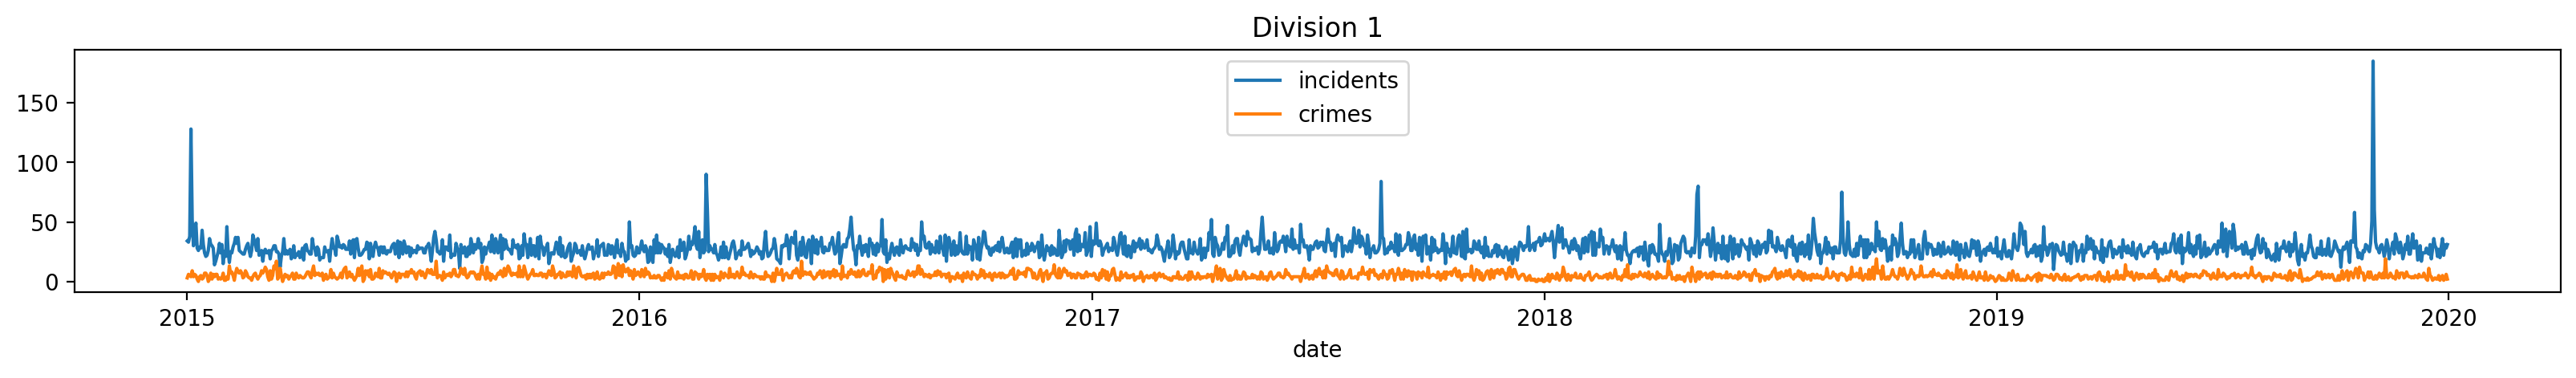

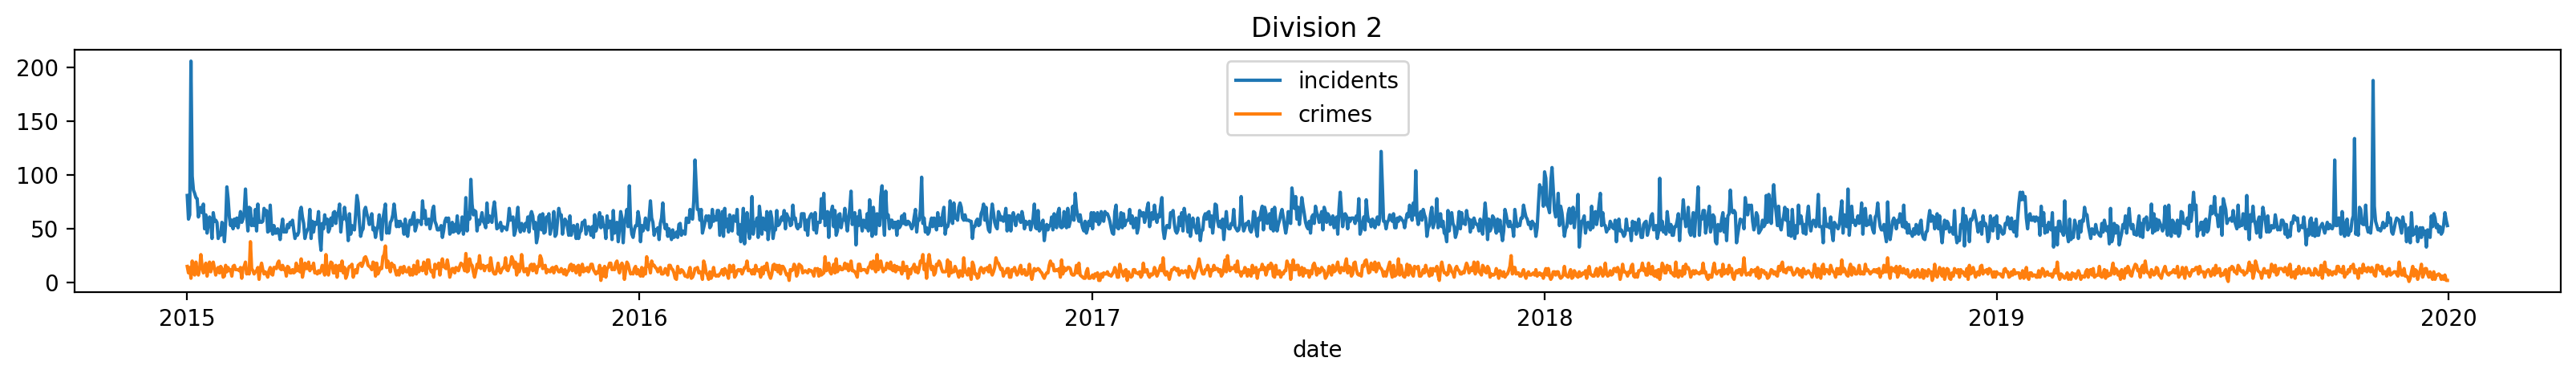

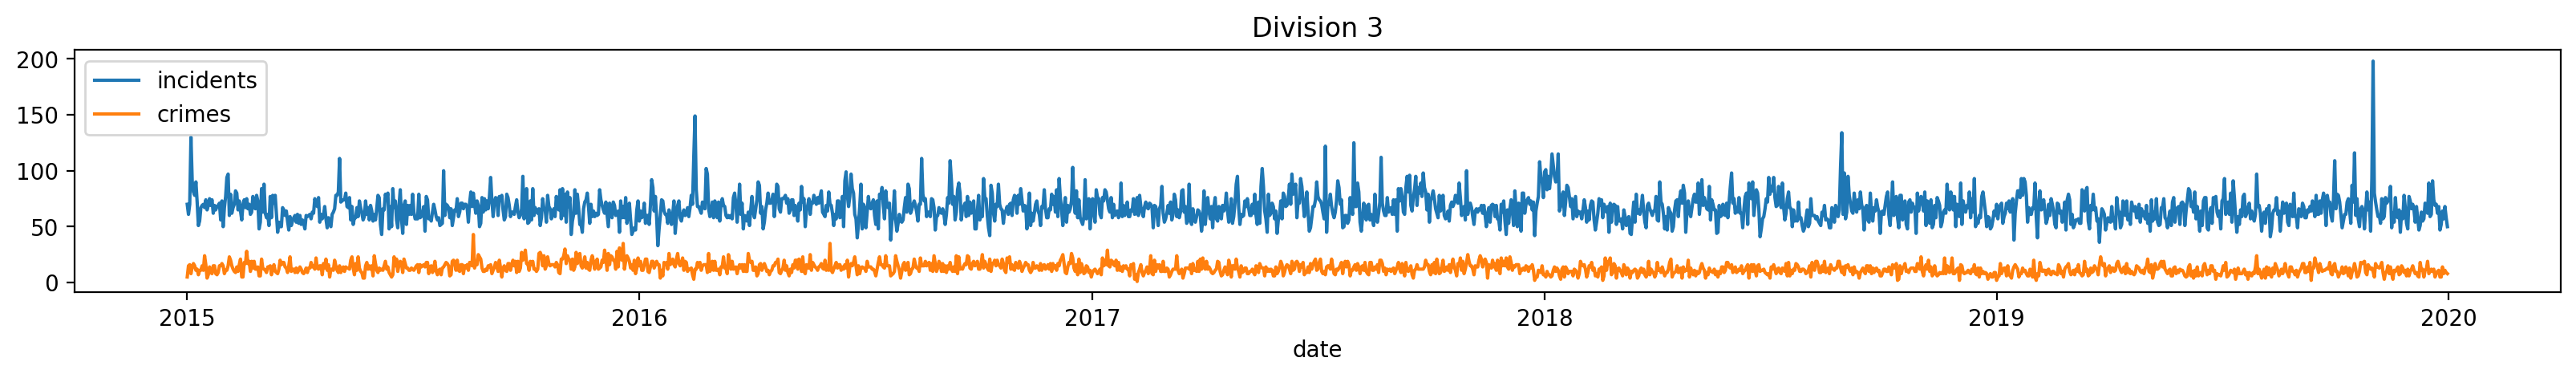

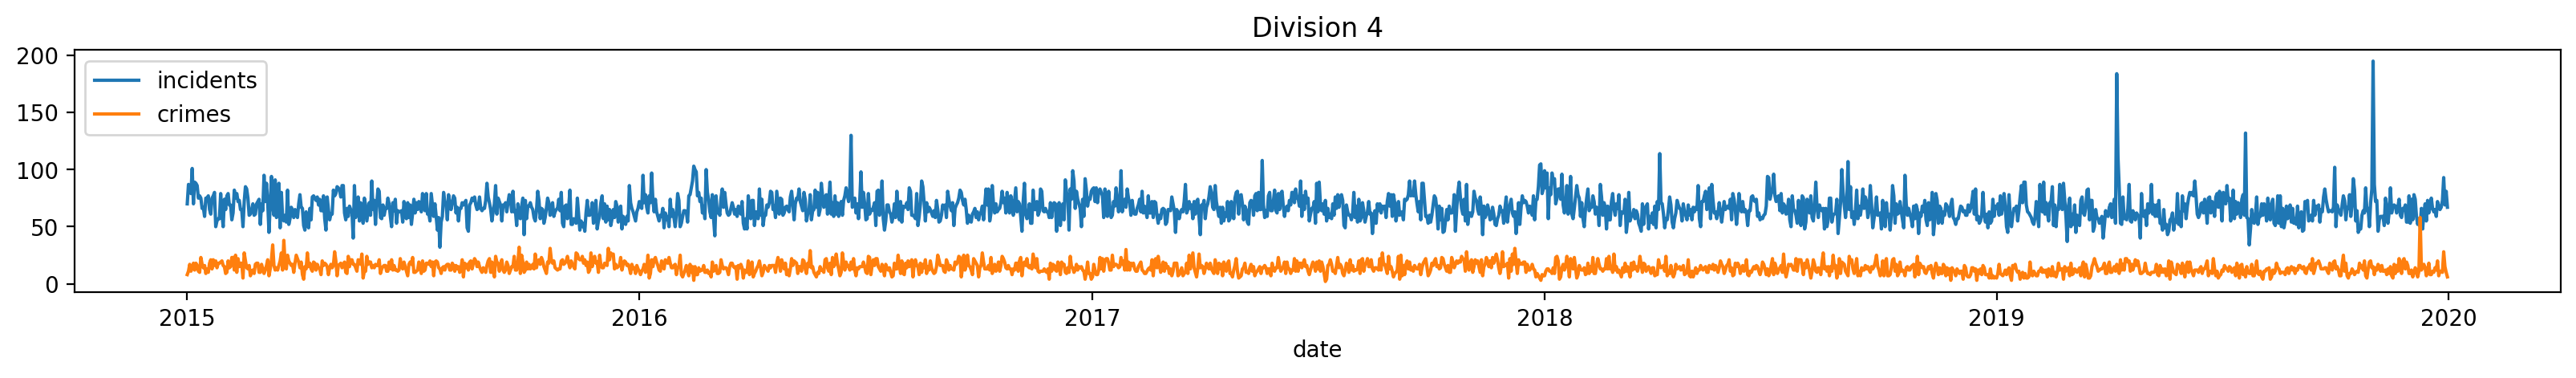

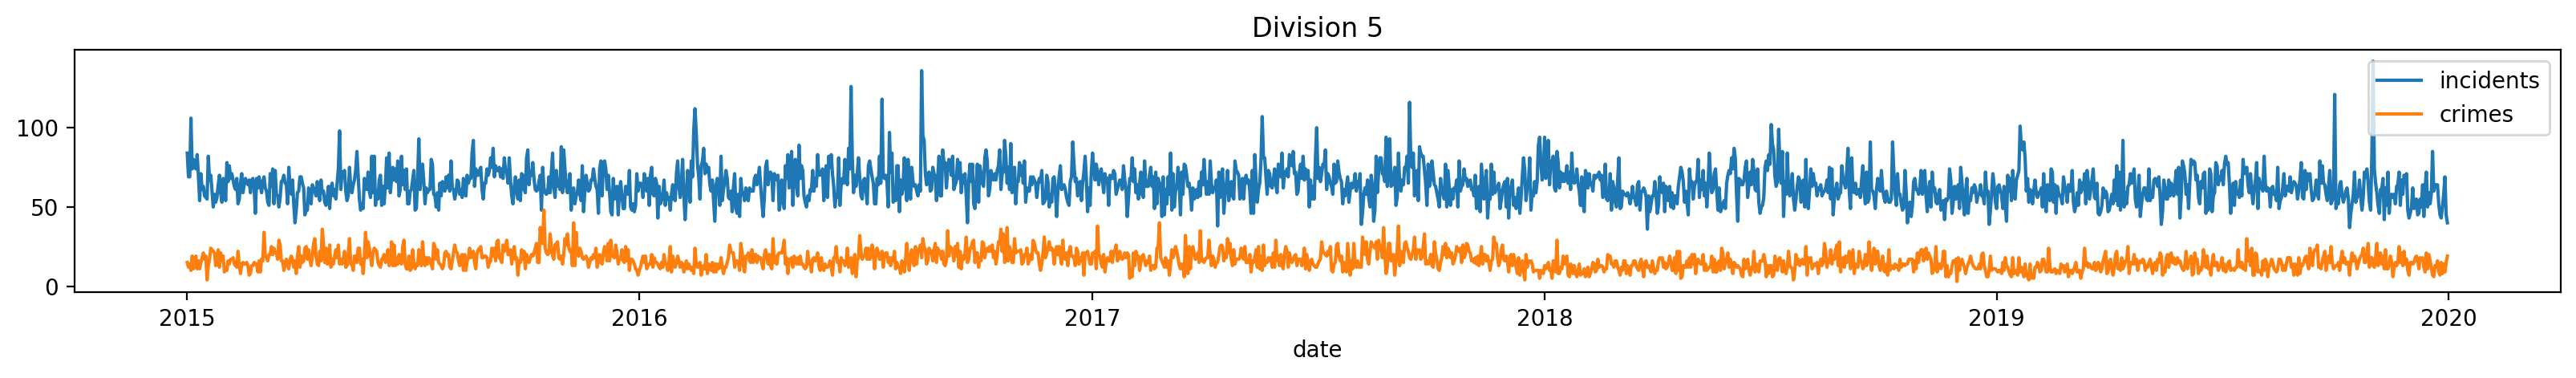

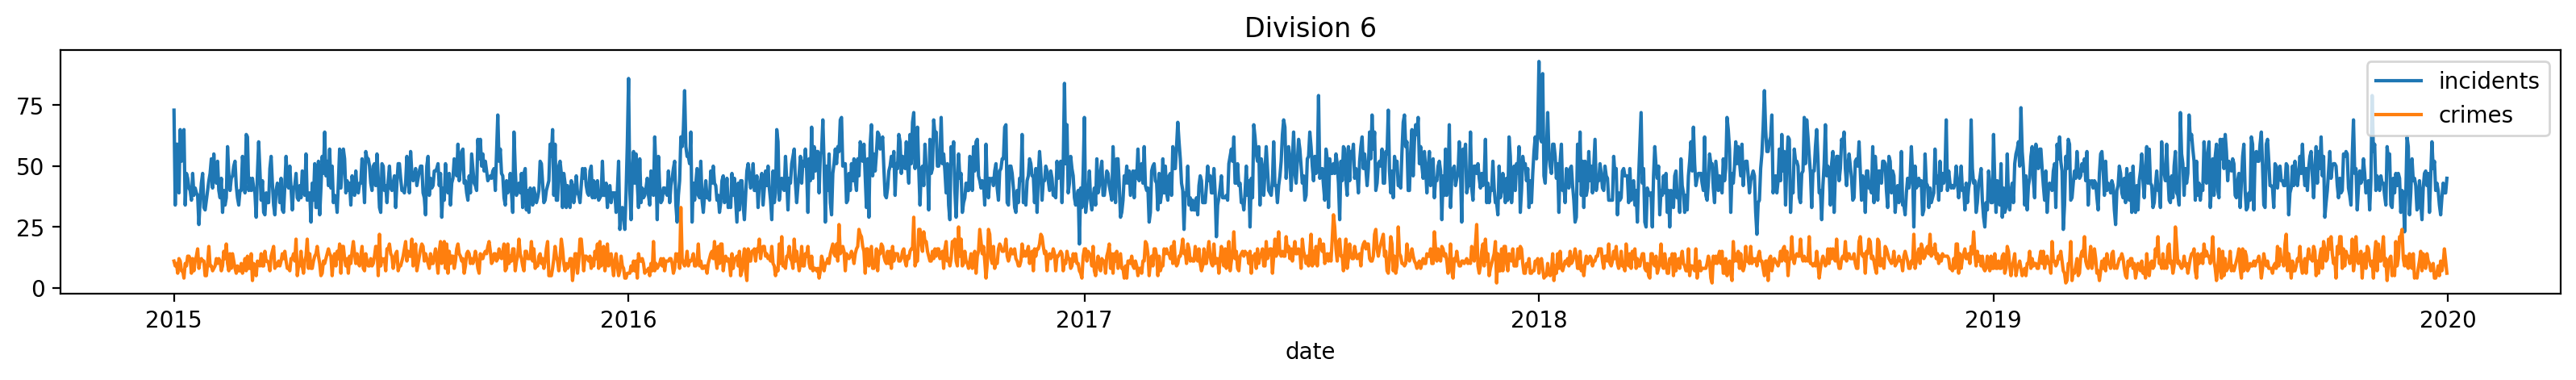

In [ ]:
# Set plot dpi and size
plt.rcParams["figure.dpi"] = 200
plt.rcParams["figure.figsize"] = (20,2)

# Plot incidents and crimes for each division
for d, div in enumerate(div_dfs, start=1):
  div[["incidents", "crimes"]].plot(title=f"Division {d}");

# Test Training Split
We'll use a sequential (70%, 20%, 10%) split for the training, inspired by 
[this TensorFlow example](https://www.tensorflow.org/tutorials/structured_data/time_series).

In [ ]:
# Define a data structure for each dataset
Dataset = namedtuple(
  "Dataset", 
  field_names = ["name", "train", "val", "test"],
)

# Function to turn a dataframe to a dataset by splitting it
def to_dataset(df, name):
  n = len(df)
  return Dataset(
    name = name,  
    train = df[0:int(n*0.7)],
    val   = df[int(n*0.7):int(n*0.9)],
    test  = df[int(n*0.9):],
  )

In [ ]:
# Split each division dataframe into training, validation, and test
div_datasets = [to_dataset(div, f"Division {d}") for d, div in enumerate(div_dfs, start=1)]

### Normalization

In [ ]:
# Define a data structure for a normalized dataset
# norm is the functional to normalize (base don the training dataset)
# denorm can be used to denormalize (inverse of the norm function)
NormalizedDataset = namedtuple(
  "NormalizedDataset", 
  field_names = ["name", "train", "val", "test", "norm", "denorm"],
)

# Normalize a dataset and return normalized train, val, test, tests along 
# with the function used to normalize and its inverse
def normalize(dataset):
  mean, std = dataset.train.mean(), dataset.train.std()
  norm = lambda df: (df - mean) / std
  return NormalizedDataset(
    name   = dataset.name,  
    train  = norm(dataset.train),
    val    = norm(dataset.val),
    test   = norm(dataset.test),
    norm   = norm,
    denorm = lambda df: df * std + mean,
  )

In [ ]:
# Normalize all division datasets
div_norms = [normalize(ds) for ds in div_datasets]

### Orignal vs. Normalized

In [ ]:
# Renders a violin chart for a normalized dataset
def violin_chart(dataset, ylabel): 
  all = pd.concat([dataset.train, dataset.val, dataset.test])
  ticks = all.keys()
  all = all.melt(var_name="Feature", value_name=ylabel)
  ax = sns.violinplot(x="Feature", y=ylabel, data=all)
  ax.set_title(dataset.name)
  ax.set_xticklabels(ticks)
  plt.show()

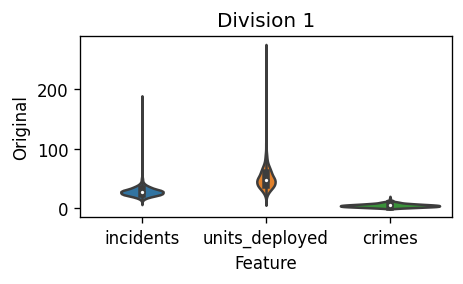

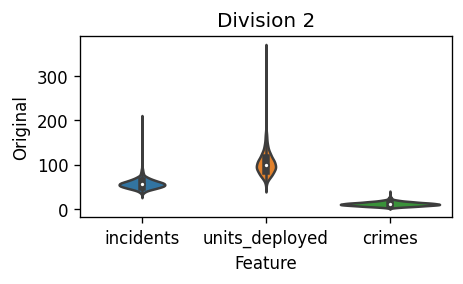

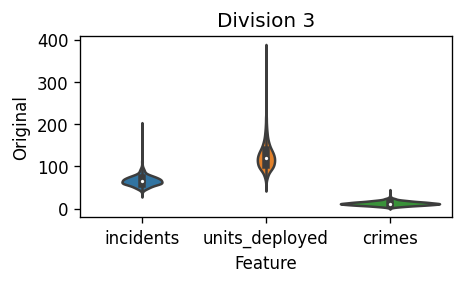

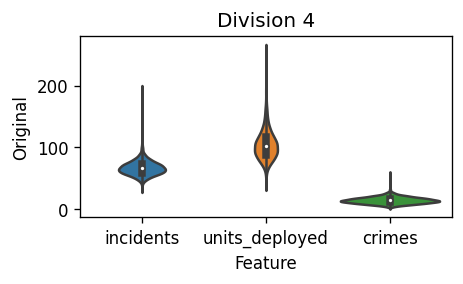

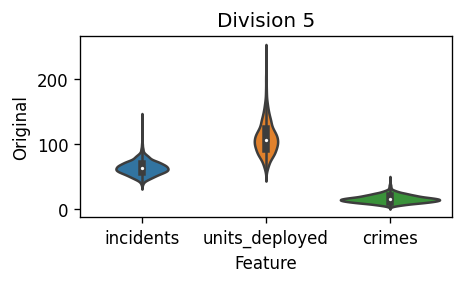

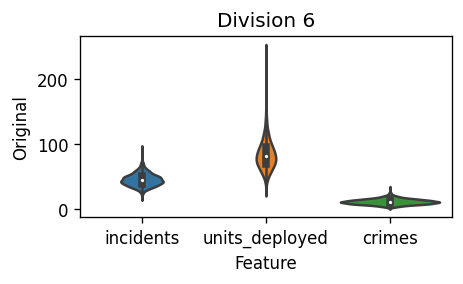

In [ ]:
# Set plot dpi and size
plt.rcParams["figure.dpi"] = 120
plt.rcParams["figure.figsize"] = (4,2)

# Plot violin chart for each original division dataset
for ds in div_datasets:
  violin_chart(ds, ylabel="Original")

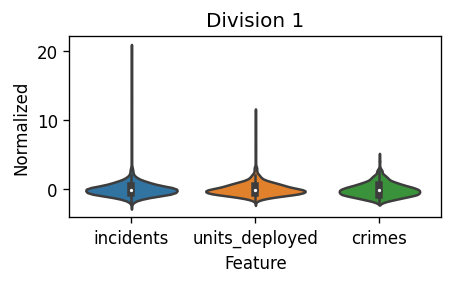

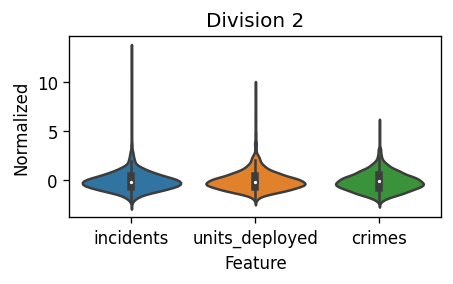

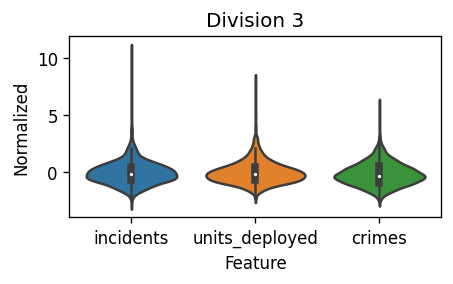

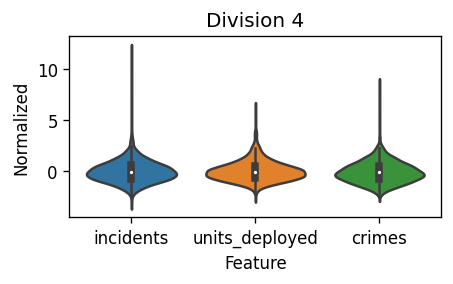

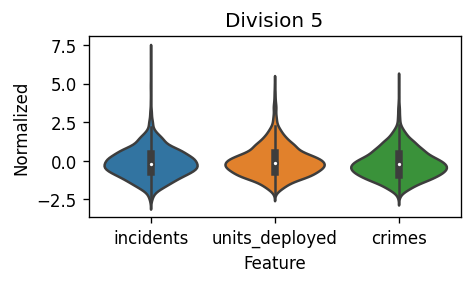

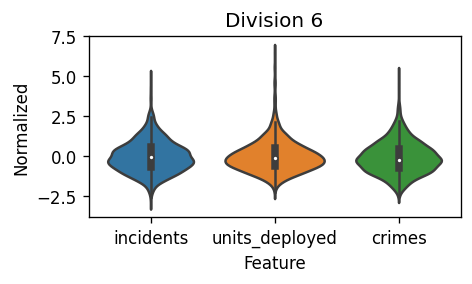

In [ ]:
# Set plot dpi and size
plt.rcParams["figure.dpi"] = 120
plt.rcParams["figure.figsize"] = (4,2)

# Plot violin chart for each normalized division dataset
for ds in div_norms:
  violin_chart(ds, ylabel="Normalized")

# Feature Engineering
In this step we prepare the data by adding engineered time-based features such as a window in the past using Tensorflow Datasets api.
This is inspired by [this official TensorFlow tutorial](https://www.tensorflow.org/tutorials/structured_data/time_series)

In [ ]:
# Helper class that generates a time series dataset from the given
# raw Pandas dataset
class WindowGenerator():
  def __init__(self, dataset: NormalizedDataset, input_width: int, shift: int, label_width: int, label_columns: [str]):
    self.dataset = dataset
    self.label_columns = label_columns
    self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
    self.column_indices = {name: i for i, name in enumerate(dataset.train.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift
    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1
      )

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,
    )
    ds = ds.map(self.split_window)
    return ds

  def plot(self, plot_col, model=None, max_subplots=3, xlabel="Date"):
    inputs, labels = self.example
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(3, 1, n+1)
      plt.ylabel(plot_col)
      plt.plot(self.input_indices, inputs[n, :, plot_col_index], label="Inputs", marker=".", zorder=-10)
  
      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index
  
      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index], edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index], marker='X', edgecolors='k', label='Predictions', c='#ff7f0e', s=64)
  
      if n == 0:
        plt.legend()

    plt.title(self.dataset.name)
    plt.xlabel(xlabel)

  @property
  def train(self):
    return self.make_dataset(self.dataset.train)

  @property
  def val(self):
    return self.make_dataset(self.dataset.val)

  @property
  def test(self):
    return self.make_dataset(self.dataset.test)

  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.train))
      # And cache it for next time
      self._example = result
    return result

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
# Division 1 windowing

div_1 = div_norms[0]

w1 = WindowGenerator(
  dataset = div_1  ,
  input_width=7, 
  shift=1,
  label_width=1, 
  label_columns=["incidents"],
)
w1

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [7]
Label column name(s): ['incidents']

### Sample
In this step we take a small sample from the dataset to 
double check the shape of the resulting window.

In [ ]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(div_1.train[:w1.total_window_size]),
                           np.array(div_1.train[100:100+w1.total_window_size]),
                           np.array(div_1.train[200:200+w1.total_window_size])])


example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 8, 3)
Inputs shape: (3, 7, 3)
labels shape: (3, 1, 1)


### Sample Visualization
In this step we see three sample windows.

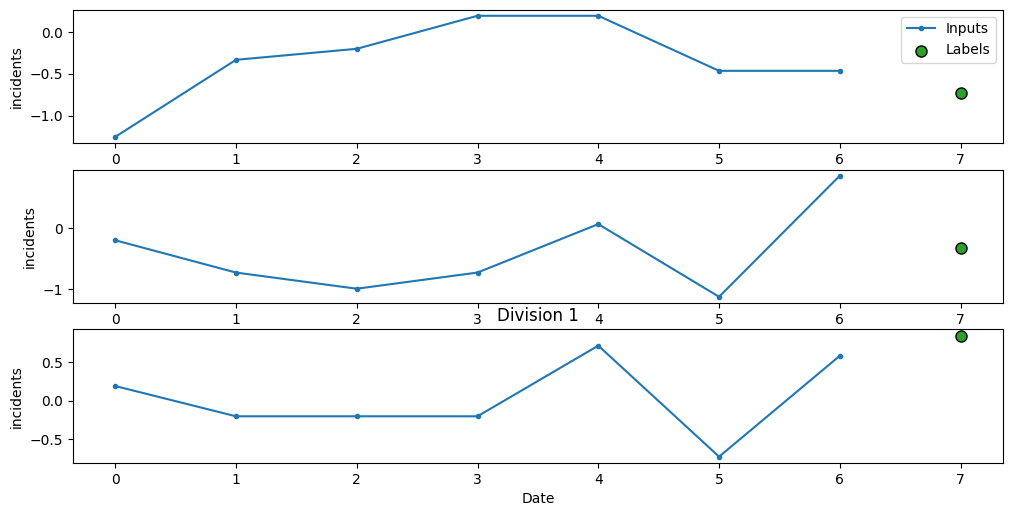

In [ ]:
# Set plot dpi and size
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (12,6)

w1.plot(plot_col="incidents")

# Baseline models
In this section we will create a baseline model for each division
that simply predicts that there will use today's knowledge for tomorrow's
prediction. In other words, the value of the target variable at next step
is predicted exactly as the value of that column at the current step. For 
low frequency time series this is a reasonable baseline.

### Baseline performance

In [ ]:
# Function to create a single datastep for a dataset
def single_step_window(dataset):
  return WindowGenerator(
    dataset=dataset,
    input_width=1, 
    label_width=1, 
    shift=1,
    label_columns=["incidents"],
  )

In [ ]:
# Create single step windows for all normalized division datasets
div_single_step_windows = [single_step_window(ds) for ds in div_norms]

In [ ]:
# Baseline model
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
# Define a data structure for performance metrics
class Perf(namedtuple("Perf", ["model", "val", "test", "history"])):
  def __repr__(self):
    return '\n'.join([
      f'Validation perf: {self.val}',
      f'Test perf: {self.test}',
    ])

def baseline_perf(window: WindowGenerator, label_column: str):
  baseline = Baseline(label_index=window.column_indices[label_column])
  baseline.compile(
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
  )
  return Perf(
    model = baseline,  
    val   = baseline.evaluate(window.val),
    test  = baseline.evaluate(window.test, verbose=0),
    history = None,
  )

In [ ]:
# Baseline performance for each division
baseline_perfs = [baseline_perf(w, label_column="incidents") for w in div_single_step_windows]

12/12 [==============================] - 0s 3ms/step - loss: 1.4067 - mean_absolute_error: 0.9526


In [ ]:
# Function to create a 7 days wide window for a dataset
def wide_window(dataset):
  return WindowGenerator(
    dataset=dataset,
    input_width=7, 
    label_width=7, 
    shift=1,
    label_columns=["incidents"],
  )

In [ ]:
# Create wide windows for all normalized division datasets
div_wide_windows = [wide_window(ds) for ds in div_norms]

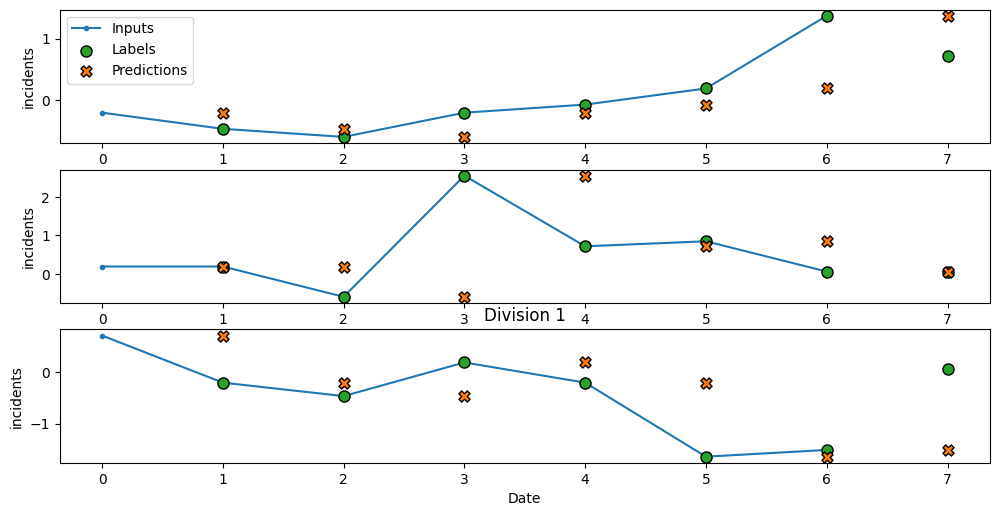

In [ ]:
# Plot a sample prediction window
div_wide_windows[0].plot(model=baseline_perfs[0].model, plot_col="incidents")

### Linear Model

In [ ]:
# Function to compile, fit, and evaluate the performance of a model to a window
def compile_fit_eval(model: tf.keras.Model, window: WindowGenerator, patience: int=2, max_epochs: int = 20) -> Perf:
  early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=patience,
    mode="min",
  )

  model.compile(
    loss=tf.losses.MeanSquaredError(),
    optimizer=tf.optimizers.Adam(),
    metrics=[tf.metrics.MeanAbsoluteError()],
  )

  history = model.fit(
    window.train,
    epochs=max_epochs,
    validation_data=window.val,
    callbacks=[early_stopping],
  )
  
  return Perf(
    model = model,  
    val   = model.evaluate(window.val),
    test  = model.evaluate(window.test, verbose=0),
    history = history,
  )

In [ ]:
# Creates a linear model, fits and evaluates its performance against the give window
def linear_fit_eval(window: WindowGenerator) -> Perf:
  return compile_fit_eval(
    model=tf.keras.Sequential([tf.keras.layers.Dense(units=1)]), 
    window=window,
  )

In [ ]:
# Fit one linear models for each division
linear_perfs = [linear_fit_eval(w) for w in div_single_step_windows]

Epoch 1/20
40/40 [==============================] - 0s 7ms/step - loss: 1.2025 - mean_absolute_error: 0.7554 - val_loss: 0.8932 - val_mean_absolute_error: 0.7078
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 1.1468 - mean_absolute_error: 0.7355 - val_loss: 0.8704 - val_mean_absolute_error: 0.7004
Epoch 3/20
40/40 [==============================] - 0s 6ms/step - loss: 1.1046 - mean_absolute_error: 0.7215 - val_loss: 0.8534 - val_mean_absolute_error: 0.6953
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 1.0711 - mean_absolute_error: 0.7097 - val_loss: 0.8418 - val_mean_absolute_error: 0.6918
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 1.0452 - mean_absolute_error: 0.7011 - val_loss: 0.8339 - val_mean_absolute_error: 0.6893
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 1.0244 - mean_absolute_error: 0.6948 - val_loss: 0.8296 - val_mean_absolute_error: 0.6886
Epoch 7/20
40/40 [==========

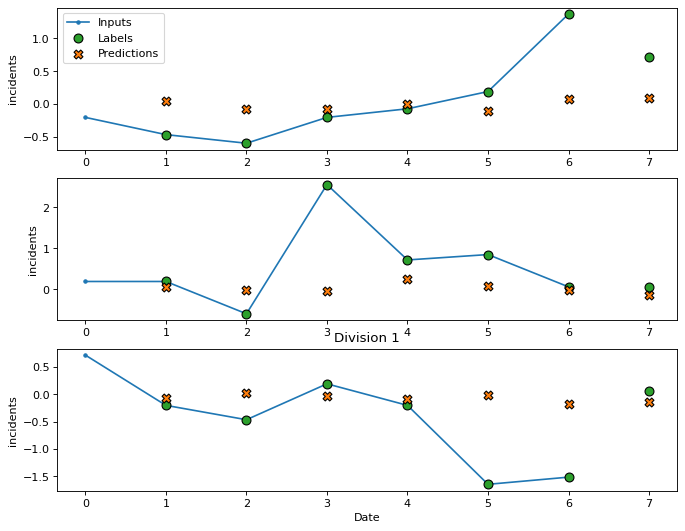

In [ ]:
# Set plot dpi and size
plt.rcParams["figure.dpi"] = 80
plt.rcParams["figure.figsize"] = (10,8)

display(HTML(f"<h1>Linear Model Prediction Examples</h1>"))
div_wide_windows[0].plot(model=linear_perfs[0].model, plot_col="incidents")

We see that the performance of the linear model is slightly better than the base line model for the evaluation set, but it performs very poorly on the test dataset.

In [ ]:
# Function to display performance of each model for each division
def display_perfs(perfs):
  for d, perf in enumerate(perfs, start=1):
    display(HTML(f"<h2>Division {d}</h2>"))
    display(perf)
    display(HTML("<hr />"))

In [ ]:
display(HTML(f"<h1>Linear Models Performance</h1>"))
display_perfs(linear_perfs)

Validation perf: [0.8271284699440002, 0.6905272006988525]
Test perf: [3.0758492946624756, 0.7878541350364685]

Validation perf: [1.0936529636383057, 0.8389196991920471]
Test perf: [2.1661481857299805, 0.9187628626823425]

Validation perf: [1.0649505853652954, 0.8003138303756714]
Test perf: [1.5567246675491333, 0.8091824650764465]

Validation perf: [1.5615705251693726, 0.9322723746299744]
Test perf: [2.110926866531372, 0.9753166437149048]

Validation perf: [1.080017328262329, 0.7967602014541626]
Test perf: [1.321536898612976, 0.8130638003349304]

Validation perf: [1.3016506433486938, 0.9284006357192993]
Test perf: [1.1663531064987183, 0.8755899667739868]

### Visualize linear model weights

In [ ]:
# Function to plot coeffieicnts of a linear model
def plot_lieanr_coeffs(window: WindowGenerator, perf: tf.keras.Model):
  plt.bar(
    x = range(len(window.dataset.train.columns)),
    height=perf.model.layers[0].kernel[:,0].numpy(),
  )
  axis = plt.gca()
  axis.set_xticks(range(len(window.dataset.train.columns)));
  axis.set_title(f"{window.dataset.name} Linear model coefficients")
  axis.set_xticklabels(window.dataset.train.columns);

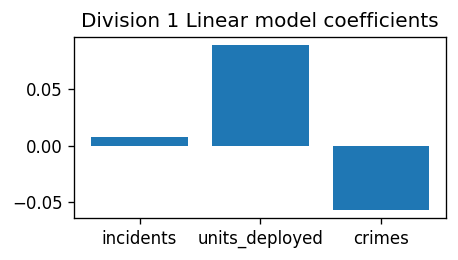

In [ ]:
# Set plot dpi and size
plt.rcParams["figure.dpi"] = 120
plt.rcParams["figure.figsize"] = (4,2)

plot_lieanr_coeffs(div_single_step_windows[0], linear_perfs[0]);

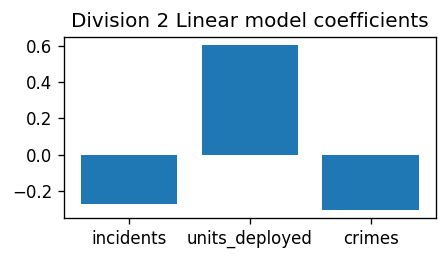

In [ ]:
plot_lieanr_coeffs(div_single_step_windows[1], linear_perfs[1]);

It's pretty clear that we should not
invest more in a linear model. Sometimes, due to having random weights, the
weight of the `incidents` column becomes close to zero or even negative which 
is very counter intuitive. Let's try more complex models now.

## Single step DNN Regressor
Before trying a wider window, let's try a more complex model on the
same single step window, to see if complexity can help with predicting
tomorrow's number of incidents by just knowing today's data.

In [ ]:
# Creates a single-step DNN model, fits and evaluates its performance against the give window
def single_step_dnn_fit_eval(window: WindowGenerator) -> Perf:
  return compile_fit_eval(
    model=tf.keras.Sequential([
      tf.keras.layers.Dense(units=64, activation="relu"),
      tf.keras.layers.Dense(units=64, activation="relu"),
      tf.keras.layers.Dense(units=1),
    ]), 
    window=window,
  )

In [ ]:
# Fit one single-step DNN models for each division
single_step_dnn_perfs = [single_step_dnn_fit_eval(w) for w in div_single_step_windows]

Epoch 1/20
40/40 [==============================] - 0s 8ms/step - loss: 0.9750 - mean_absolute_error: 0.6855 - val_loss: 0.8650 - val_mean_absolute_error: 0.7152
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.9578 - mean_absolute_error: 0.6805 - val_loss: 0.8233 - val_mean_absolute_error: 0.6908
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.9482 - mean_absolute_error: 0.6748 - val_loss: 0.8597 - val_mean_absolute_error: 0.7146
Epoch 4/20
12/12 [==============================] - 0s 2ms/step - loss: 0.8329 - mean_absolute_error: 0.6966
Epoch 1/20
40/40 [==============================] - 0s 8ms/step - loss: 0.9442 - mean_absolute_error: 0.6865 - val_loss: 0.8029 - val_mean_absolute_error: 0.7203
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.9201 - mean_absolute_error: 0.6790 - val_loss: 0.8097 - val_mean_absolute_error: 0.7239
Epoch 3/20
40/40 [==============================] - 0s 6ms/step - loss: 0.9187 - 

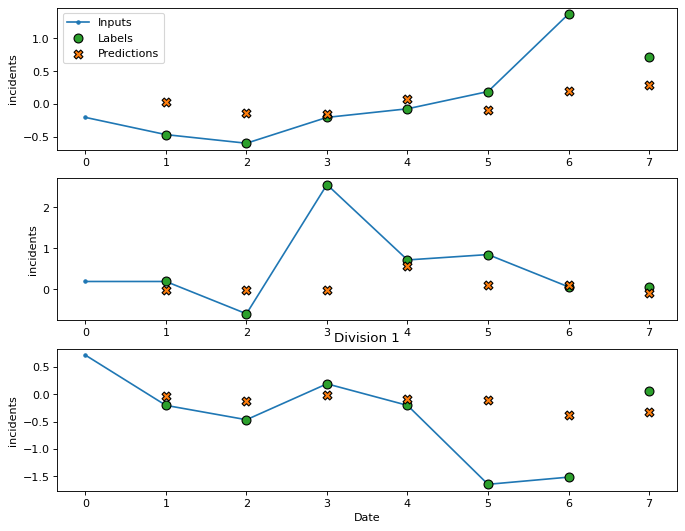

In [ ]:
# Set plot dpi and size
plt.rcParams["figure.dpi"] = 80
plt.rcParams["figure.figsize"] = (10,8)

display(HTML(f"<h1>Single Step DNN Prediction Examples</h1>"))
div_wide_windows[0].plot(model=single_step_dnn_perfs[0].model, plot_col="incidents")

In [ ]:
display(HTML(f"<h1>Single Step DNN Performance</h1>"))
display_perfs(single_step_dnn_perfs)

Validation perf: [0.8329247236251831, 0.6965613961219788]
Test perf: [2.935840606689453, 0.7902761697769165]

Validation perf: [0.8029197454452515, 0.7202445864677429]
Test perf: [1.8756659030914307, 0.7697722315788269]

Validation perf: [0.9317725300788879, 0.7652466893196106]
Test perf: [1.5400220155715942, 0.8018073439598083]

Validation perf: [1.4098968505859375, 0.8767621517181396]
Test perf: [1.985066533088684, 0.8997355103492737]

Validation perf: [0.9110092520713806, 0.7604051232337952]
Test perf: [1.2619107961654663, 0.8026024103164673]

Validation perf: [0.890742301940918, 0.743492066860199]
Test perf: [0.8088974356651306, 0.7045372724533081]

It is clear that the hidden layers, even with a RELU activation function which
together can capture non-linearity are performing almost as poor as a linear model. So as a next step let's widen the window and look at past 7 days.

### Multistep DNN (7 days window)

In [ ]:
# Function to create a 7 days convolutional window for a dataset
def conv_window(dataset: NormalizedDataset, width: int, label_columns: [str]) -> WindowGenerator:
  return WindowGenerator(
    dataset=dataset,
    input_width=width, 
    label_width=1, 
    shift=1,
    label_columns=label_columns,
  )

In [ ]:
# Create convulutional windows for all normalized division datasets
div_conv_windows = [conv_window(dataset=ds,width=7,label_columns=["incidents"]) for ds in div_norms]

In [ ]:
# Function to create an empty fresh multi-step DNN
def multi_step_dense_model() -> tf.keras.Model:
  return tf.keras.Sequential(
    [
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(units=32, activation="relu"),
      tf.keras.layers.Dense(units=32, activation="relu"),
      tf.keras.layers.Dense(units=1),
      tf.keras.layers.Reshape([1, -1]),
    ]
  )

In [ ]:
# Creates a multi-step DNN model, fits and evaluates its performance against the give window
def multi_step_dnn_fit_eval(window: WindowGenerator) -> Perf:
  return compile_fit_eval(model=multi_step_dense_model(),window=window)

In [ ]:
# Fit one multi-step DNN for each division
mutil_step_dnn_perfs = [multi_step_dnn_fit_eval(w) for w in div_conv_windows]

Epoch 1/20
40/40 [==============================] - 0s 7ms/step - loss: 0.9122 - mean_absolute_error: 0.6979 - val_loss: 0.8740 - val_mean_absolute_error: 0.7007
Epoch 2/20
40/40 [==============================] - 0s 6ms/step - loss: 0.8331 - mean_absolute_error: 0.6640 - val_loss: 0.8634 - val_mean_absolute_error: 0.6945
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.8061 - mean_absolute_error: 0.6519 - val_loss: 0.8651 - val_mean_absolute_error: 0.6947
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.7872 - mean_absolute_error: 0.6462 - val_loss: 0.8627 - val_mean_absolute_error: 0.6926
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.7703 - mean_absolute_error: 0.6385 - val_loss: 0.8509 - val_mean_absolute_error: 0.6870
Epoch 6/20
40/40 [==============================] - 0s 6ms/step - loss: 0.7567 - mean_absolute_error: 0.6358 - val_loss: 0.8581 - val_mean_absolute_error: 0.6895
Epoch 7/20
12/12 [==========

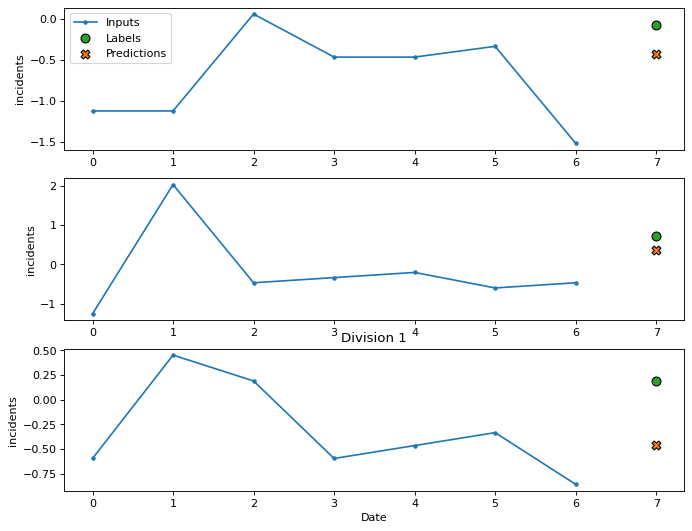

In [ ]:
# Set plot dpi and size
plt.rcParams["figure.dpi"] = 80
plt.rcParams["figure.figsize"] = (10,8)

display(HTML(f"<h1>Division 1 Multi Step DNN Prediction Examples</h1>"))
div_conv_windows[0].plot(model=mutil_step_dnn_perfs[0].model, plot_col="incidents")

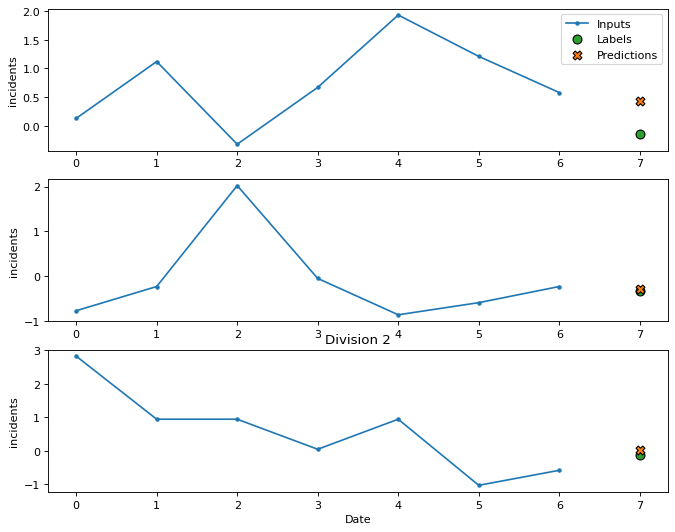

In [ ]:
display(HTML(f"<h1>Division 2 Multi Step DNN Prediction Examples</h1>"))
div_conv_windows[1].plot(model=mutil_step_dnn_perfs[1].model, plot_col="incidents")

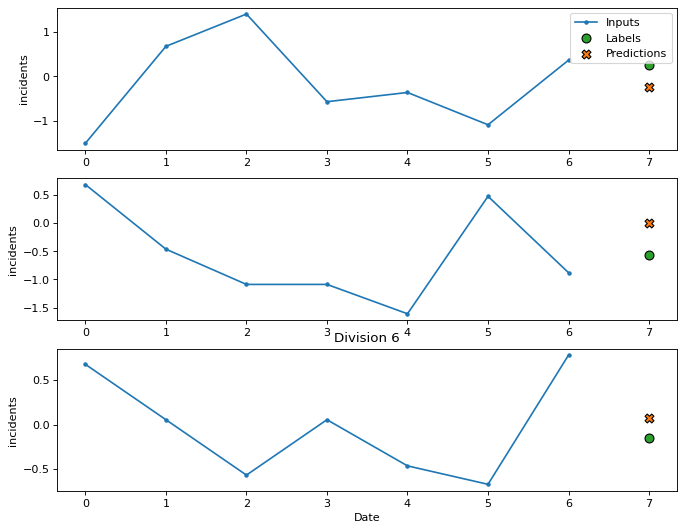

In [ ]:
display(HTML(f"<h1>Division 6 Multi Step DNN Prediction Examples</h1>"))
div_conv_windows[5].plot(model=mutil_step_dnn_perfs[5].model, plot_col="incidents")

In [ ]:
display(HTML(f"<h1>Single Step DNN Performance</h1>"))
display_perfs(mutil_step_dnn_perfs)

Validation perf: [0.8567589521408081, 0.6921371221542358]
Test perf: [3.0591070652008057, 0.7712920904159546]

Validation perf: [0.7571088075637817, 0.6956733465194702]
Test perf: [1.7999279499053955, 0.7356967329978943]

Validation perf: [0.9492774605751038, 0.7745091915130615]
Test perf: [1.5644378662109375, 0.8161633014678955]

Validation perf: [1.5223662853240967, 0.9203576445579529]
Test perf: [2.0405638217926025, 0.9370895028114319]

Validation perf: [0.9169839024543762, 0.7563825249671936]
Test perf: [1.3379442691802979, 0.8318955898284912]

Validation perf: [0.8812417984008789, 0.7385621070861816]
Test perf: [0.8646020293235779, 0.743662416934967]

We can see that the model performs better than a single step window. There is still some overfitting and
the overall performance is not much better than the baseline performance so there is still work to do.

# Models

### CNN with a 7 day window

In [ ]:
# Function that creates a new CNN model
def conv_model(width: int) -> tf.keras.Model:
  return  tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=(width,), activation="relu",kernel_regularizer=tf.keras.regularizers.l2(l2=0.05)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.175),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=8, activation="relu"),
    tf.keras.layers.Dense(units=1),
  ])

In [ ]:
# Creates a CNN model, fits and evaluates its performance against the give window
def cnn_fit_eval(window: WindowGenerator) -> Perf:
  return compile_fit_eval(model=conv_model(window.input_width),window=window)

In [ ]:
# Fit one CNN model for each division
cnn_perfs = [cnn_fit_eval(w) for w in div_conv_windows]

Epoch 1/20
40/40 [==============================] - 0s 11ms/step - loss: 1.4690 - mean_absolute_error: 0.8354 - val_loss: 1.0729 - val_mean_absolute_error: 0.6770
Epoch 2/20
40/40 [==============================] - 0s 7ms/step - loss: 1.2634 - mean_absolute_error: 0.7516 - val_loss: 1.0798 - val_mean_absolute_error: 0.6867
Epoch 3/20
12/12 [==============================] - 0s 2ms/step - loss: 1.0834 - mean_absolute_error: 0.6951
Epoch 1/20
40/40 [==============================] - 0s 12ms/step - loss: 1.8284 - mean_absolute_error: 0.9640 - val_loss: 1.0608 - val_mean_absolute_error: 0.6986
Epoch 2/20
40/40 [==============================] - 0s 6ms/step - loss: 1.4163 - mean_absolute_error: 0.8208 - val_loss: 1.0418 - val_mean_absolute_error: 0.6888
Epoch 3/20
40/40 [==============================] - 0s 7ms/step - loss: 1.2652 - mean_absolute_error: 0.7752 - val_loss: 1.0328 - val_mean_absolute_error: 0.6886
Epoch 4/20
40/40 [==============================] - 0s 7ms/step - loss: 1.1689 

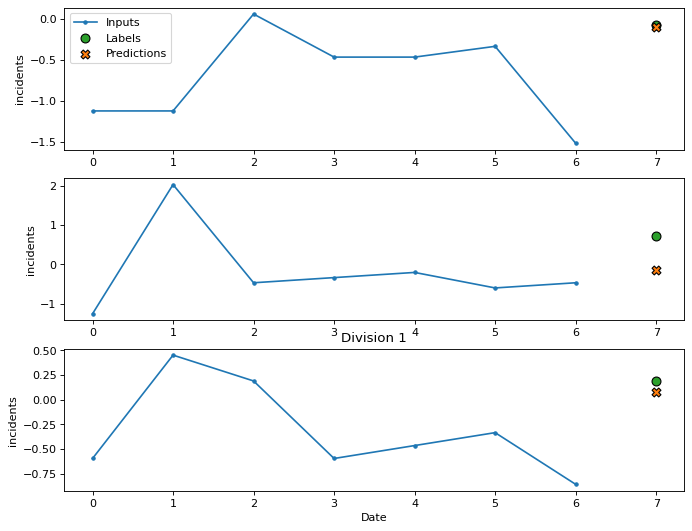

In [ ]:
# Set plot dpi and size
plt.rcParams["figure.dpi"] = 80
plt.rcParams["figure.figsize"] = (10,8)

display(HTML(f"<h1>Division 1 CNN Prediction Examples</h1>"))
div_conv_windows[0].plot(model=cnn_perfs[0].model, plot_col="incidents")

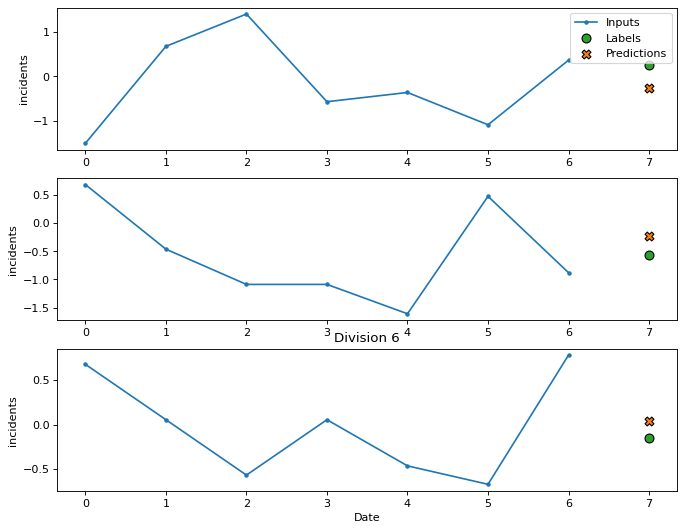

In [ ]:
display(HTML(f"<h1>Division 6 CNN Prediction Examples</h1>"))
div_conv_windows[5].plot(model=cnn_perfs[5].model, plot_col="incidents")

In [ ]:
display(HTML(f"<h1>CNN Performance</h1>"))
display_perfs(cnn_perfs)

Validation perf: [1.0834128856658936, 0.695052444934845]
Test perf: [3.469680070877075, 0.803981602191925]

Validation perf: [0.8529180884361267, 0.6739341020584106]
Test perf: [2.0741519927978516, 0.758848249912262]

Validation perf: [1.252113938331604, 0.7853263020515442]
Test perf: [1.8390690088272095, 0.8139406442642212]

Validation perf: [1.6365525722503662, 0.8703169226646423]
Test perf: [2.2215001583099365, 0.8923509120941162]

Validation perf: [1.0378413200378418, 0.7561480402946472]
Test perf: [1.5174651145935059, 0.8412424325942993]

Validation perf: [1.14767324924469, 0.7681060433387756]
Test perf: [1.0643779039382935, 0.733102560043335]

The performance is dropped a bit compared to multi-step DNN and there model seems to be overfit as well. Regularization and batch normalization, and
hyper parameter tuning may help and that's exactly our next steps to explore.

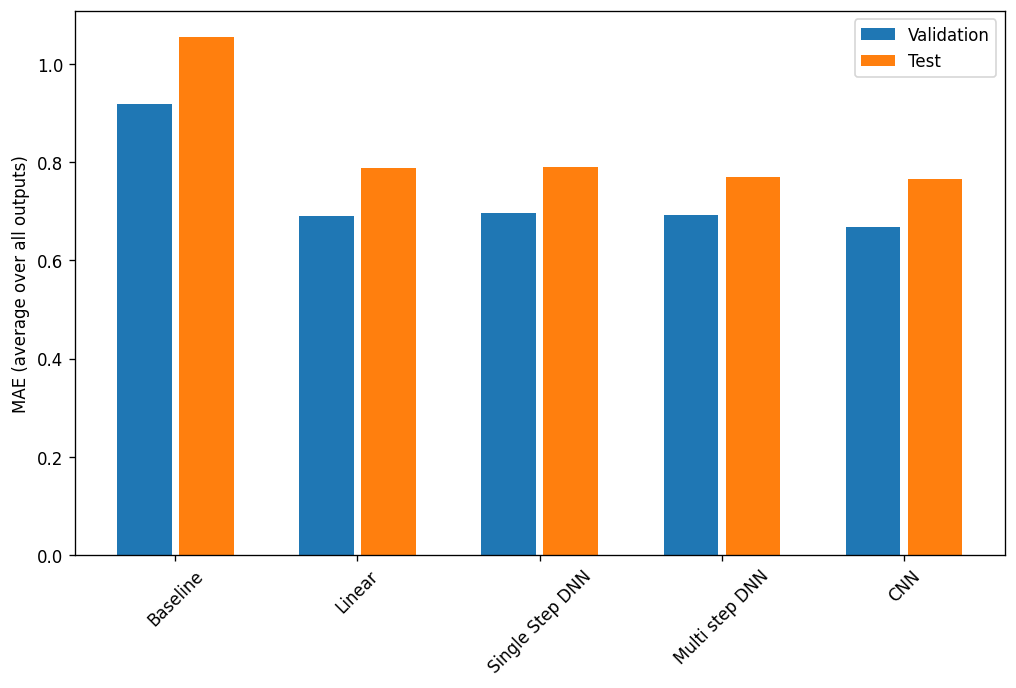

In [ ]:
# Set plot dpi and size
plt.rcParams["figure.dpi"] = 120
plt.rcParams["figure.figsize"] = (10,6)

all_perfs = [
  baseline_perfs[0],
  linear_perfs[0],
  single_step_dnn_perfs[0],
  mutil_step_dnn_perfs[0],
  cnn_perfs[0],
]

x = np.arange(len(all_perfs))
width = 0.3

metric_name = "mean_absolute_error"
metric_index = cnn_perfs[0].model.metrics_names.index("mean_absolute_error")
val_mae = [p.val[metric_index] for p in all_perfs]
test_mae = [p.test[metric_index] for p in all_perfs]

plt.bar(x - 0.17, val_mae, width, label="Validation")
plt.bar(x + 0.17, test_mae, width, label="Test")
xlabels = [
  "Baseline",
  "Linear",
  "Single Step DNN",
  "Multi step DNN",
  "CNN",
]
plt.xticks(ticks=x, labels=xlabels, rotation=45)
plt.ylabel('MAE (average over all outputs)')
plt.legend();